<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/PCA_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
#from tensorflow import keras
print(tf.__version__)

2.3.0


In [12]:
train, test = tf.keras.datasets.mnist.load_data()
images, labels = train
images = images/255

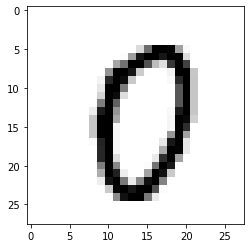

In [13]:
import matplotlib.pyplot as plt
plt.imshow(images[1000,:,:],cmap= 'binary')
plt.show()

In [14]:
import numpy as np
print(np.unique(labels))
print(images.shape)

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [15]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1
Xtrain = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest = Xtest.reshape(Xtest.shape[0],-1)
Xtrain.shape

(60000, 784)

$P(X,Y)$; $X: entradas$; $Y: salidas$

$P(X|Y)P(Y)=P(Y|X)P(X)$

Riesgo 

$R(Y,\hat{Y})=\int \mathcal{L}(Y,f(X))dP(X,Y)$

$R(Y,\hat{Y})=\int \mathcal{L}(Y,f(X))p(x,y)dXY$

$R(Y,\hat{Y})=E_{p(x,y)}\{\mathcal{L}(Y,f(X))\}$

$R_{emp}(Y,\hat{Y})=\frac{1}{N}\sum_n\{\mathcal{L}(y_n,f(x_n))\} + \phi(f)$


$f(X)=\hat{Y}$

loss

In [16]:
#costo regularizacion ortogonal
class MyRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, lam=1.0):
        self.lam = lam
    def __call__(self, x):
        E = tf.linalg.matmul(x,x,transpose_a=True)-tf.eye(tf.shape(x)[1]) 
        return self.lam * tf.linalg.trace(tf.linalg.matmul(E,E))


$\frac{1}{N}\sum_n\|x_n-\hat{x}_n\|_2+\lambda\|W^\top W - I \|^2_F$

l_2 -> $\lambda\|W\|_2$
l_1 -> $\lambda\|W\|_1$


$u_l = \gamma_l\left(W_l^\top u_{l-1}+b_l\right)$

$W_l\in\mathbb{R}^{Q_{l-1} \times Q_{l}}$

$Q_l = M$

$Q_{l-1} = P = 784$


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputA (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
encoder (Dense)              (None, 2)                 1568      
_________________________________________________________________
decoder (Dense)              (None, 784)               1568      
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________


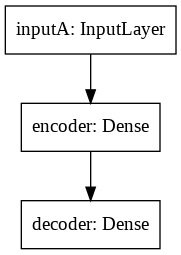

In [18]:
lam = 1
Q = 2

encoder = tf.keras.layers.Dense(Q,activation="linear", name='encoder',use_bias=False,kernel_regularizer=MyRegularizer(lam=lam))
                          #kernel_regularizer=MyRegularizer(lam=lam))


decoder = tf.keras.layers.Dense(Xtrain.shape[1],activation="linear", name='decoder',use_bias=False,kernel_regularizer=MyRegularizer(lam=lam))

inputA = tf.keras.layers.Input(shape=(Xtrain.shape[1]), name='inputA')

enc = encoder(inputA) # xw_e
dec = decoder(enc) #zw_d=xe

model = tf.keras.Model(inputs=inputA,outputs=dec)

model.compile(loss=tf.keras.losses.MeanSquaredError(), #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

model.summary()
tf.keras.utils.plot_model(model)


In [19]:
history = model.fit(Xtrain, Xtrain, epochs=100,batch_size=256, # 32, 64, 128, 256
                    validation_split=0.2)

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 782.2436 - val_loss: 782.1108
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 782.1109 - val_loss: 782.1084
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 782.1051 - val_loss: 782.0989
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0906 - val_loss: 782.0807
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0732 - val_loss: 782.0679
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0652 - val_loss: 782.0641
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0632 - val_loss: 782.0635
Epoch 8/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0629 - val_loss: 782.0632
Epoch 9/100
188/188 [==============================] - 1s 4ms/step - loss: 782.0627 - val_loss: 782.0630
Epoch 10/100
188/188 [==============================] -

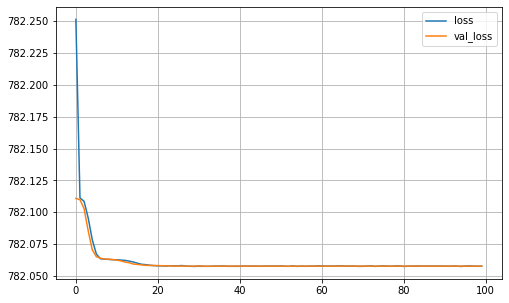

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
model_enc = tf.keras.Model(inputs=model.input,outputs=model.get_layer('encoder').output)
zest = model_enc.predict(Xtest)
zest.shape

(10000, 2)

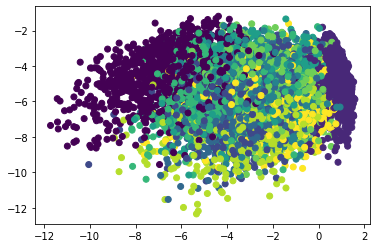

In [ ]:
plt.scatter(zest[:,0],zest[:,1],c=ytest)
plt.show()

(784, 2)


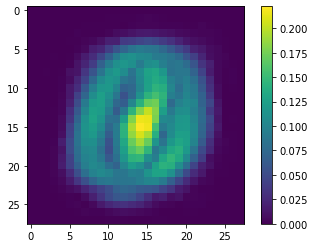

In [20]:
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
print(model.layers[1].get_weights()[0].shape)
plt.colorbar()
plt.show()

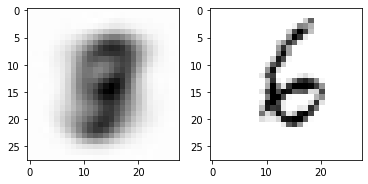

In [21]:
Xteste = model.predict(Xtest)
plt.subplot(121)
plt.imshow(Xteste[2000].reshape(28,28),cmap='binary')
plt.subplot(122)
plt.imshow(Xtest[2000].reshape(28,28),cmap='binary')
plt.show()

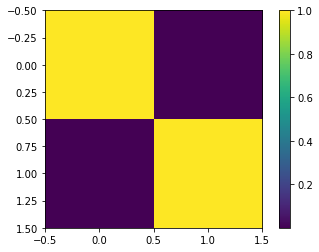

In [22]:
W = model.layers[1].get_weights()[0]
plt.imshow((W.T).dot(W))
plt.colorbar()
plt.show()

In [23]:
We = model.layers[1].get_weights()[0]
Wd = model.get_layer('decoder').get_weights()[0]

In [24]:
print(We.shape,Wd.shape)

(784, 2) (2, 784)


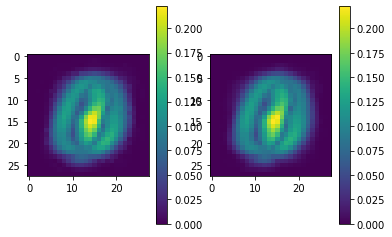

In [26]:
plt.subplot(121)
plt.imshow(abs(We).sum(axis=1).reshape(28,28))
plt.colorbar()

plt.subplot(122)
plt.imshow(abs(Wd).sum(axis=0).reshape(28,28))
plt.colorbar()
plt.show()

In [29]:
np.linalg.norm(We-Wd.T)

0.05619007

In [46]:
from sklearn.decomposition import PCA
red = PCA()

In [47]:
ze = red.fit_transform(Xtrain)
zt = red.transform(Xtest)

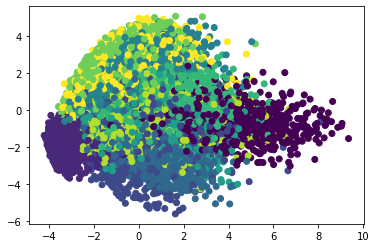

In [48]:
plt.scatter(zt[:,0],zt[:,1],c=ytest)
plt.show()

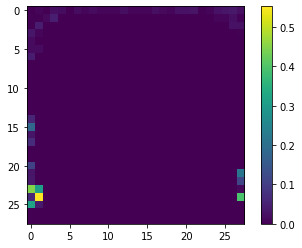

In [56]:
plt.imshow(abs(red.components_[760].reshape(1,-1)).sum(axis=0).reshape(28,28))
plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

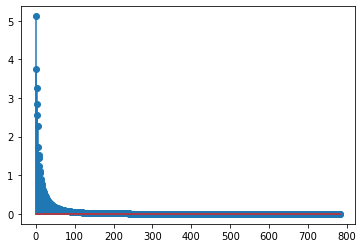

In [57]:
plt.stem(red.explained_variance_)

In [58]:
red.singular_values_
zt.shape

(10000, 784)

In [59]:
xte = zt.dot(red.components_)
xte.shape

(10000, 784)

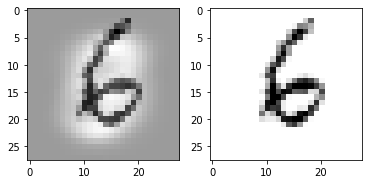

In [60]:
plt.subplot(121)
plt.imshow(xte[2000].reshape(28,28),cmap='binary')
plt.subplot(122)
plt.imshow(Xtest[2000].reshape(28,28),cmap='binary')
plt.show()